In [209]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [314]:
#Variables...

'''
('min0', 81)
('max0', 83)
('min1', 92)
('max1', 129)
('min2', 9)
('max2', 254)
'''

# Puck HSV Bounds (Green)
#pucklowerBound=np.array([182,100,50])
#puckupperBound=np.array([104,170,160])

# Puck HSV Bounds (pink)
#pucklowerBound=np.array([158,42,91])
#puckupperBound=np.array([175,92,242])
pucklowerBound=np.array([122,57,9])
puckupperBound=np.array([132,93,254])

# Bot HSV Bounds (White 3dPrint)
#botlowerBound=np.array([95,15,165])
#botupperBound=np.array([110,30,180])

# red thing on top of bot
#botlowerBound=np.array([100,140,110])
#botupperBound=np.array([120,185,150])

#Blue post-it
botlowerBound=np.array([9,83,9])
botupperBound=np.array([42,127,254])

corner_back_left_lower=np.array([81,92,9])
corner_back_left_upper=np.array([83,129,254])

In [315]:
def cleanMask(dirty_mask):
    points = []
    for i in range(dirty_mask.shape[0]):
        for j in range(dirty_mask.shape[1]):
            if dirty_mask[i, j] == 255:
                points.append((i,j))
    #Remove exterior dots
    padding = 2
    from collections import deque
    remaining_points = set(points)
    saved_locations = []
    while remaining_points:
        current_point = remaining_points.pop()
        y = current_point[0]
        x = current_point[1]
        saved_points = set()
        horizon = deque([(y-1,x-1),(y+1,x-1),(y-1,x+1),(y+1,x+1)])
        saved_points.add(current_point)
        while(len(horizon) > 0):
            to_check = horizon.pop()
            y = to_check[0]
            x = to_check[1]
            if to_check in remaining_points:
                remaining_points.discard(to_check)
                horizon.appendleft((y-1,x-1))
                horizon.appendleft((y+1,x-1))
                horizon.appendleft((y-1,x+1))
                horizon.appendleft((y+1,x+1))
                saved_points.add(to_check)
        saved_locations.append(saved_points)
    cleaned_mask = dirty_mask.copy()
    cleaned_mask[:,:] = 0
    max_location = set()
    for location in saved_locations:
        if location:
            if len(location) > len(max_location):
                max_location = location

    for y, x in max_location:
        cleaned_mask[y-padding:y+padding,x-padding:x+padding] = 255
        
    return cleaned_mask;

def getHSVMask(hsv_img, range_lower_bound, range_upper_bound):
    hsv_mask=cv2.inRange(hsv_img,range_lower_bound,range_upper_bound)
    return hsv_mask

def getOpenCloseMask(orig_mask):
    kernelOpen=np.ones((3,3))
    kernelClose=np.ones((10,10))
    
    mask_open=cv2.morphologyEx(orig_mask,cv2.MORPH_OPEN,kernelOpen);
    mask_close=cv2.morphologyEx(orig_mask,cv2.MORPH_CLOSE,kernelClose);
    
    return mask_open,mask_close;

def getMaskRectangle(clean_mask):
    # Get contours
    _, contours, _=cv2.findContours(clean_mask.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE);
    
    # Determine biggest contour and use that.
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours];
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1];

    #print 'biggest_contour';
    #biggest_contour;
    
    # Generate rect from contour
    x,y,w,h = cv2.boundingRect(biggest_contour);
    
    return x,y,w,h;

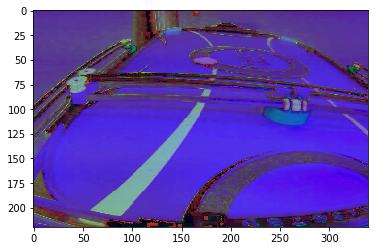

In [316]:
# Get Image
img=cv2.imread("8.jpg");
img=cv2.resize(img,(340,220));

#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#convert image to HSV
#hsv_image=cv2.cvtColor(img[85:140,150:200,:], cv2.COLOR_BGR2HSV)
hsv_image=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#hsv_image=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_image)

#gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray = cv2.bilateralFilter(gray, 11, 17, 17)

#edged = cv2.Canny(gray, 30, 200)
#plt.imshow(edged)

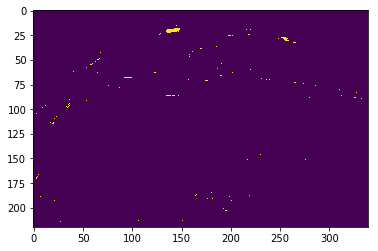

In [317]:
# Get HSV Mask for bot and puck from HSV image.
#puck_mask=getHSVMask(hsv_image.copy()[90:115,280:320,:],pucklowerBound, puckupperBound);
#puck_mask=getHSVMask(hsv_image.copy(),pucklowerBound, puckupperBound);
#bot_mask=getHSVMask(hsv_image.copy(),botlowerBound,botupperBound);
corner_back_left_mask=getHSVMask(hsv_image.copy(),corner_back_left_lower,corner_back_left_upper)

#plt.imshow(puck_mask)
#plt.imshow(bot_mask)
plt.imshow(corner_back_left_mask)

In [214]:
# Clean Noise form mask
#puck_mask_cleaned = cleanMask(puck_mask);
#bot_mask_close_cleaned = cleanMask(bot_mask_close);


#plt.imshow(puck_mask_cleaned)
#plt.imshow(bot_mask_close_cleaned)
#plt.imshow(board_mask_close_cleaned)

In [318]:
#Get open & Close mask
#puck_mask_open,puck_mask_close=getOpenCloseMask(puck_mask);
#bot_mask_open,bot_mask_close=getOpenCloseMask(bot_mask);
corner_back_left_mask_open,corner_back_left_mask_close=getOpenCloseMask(corner_back_left_mask)

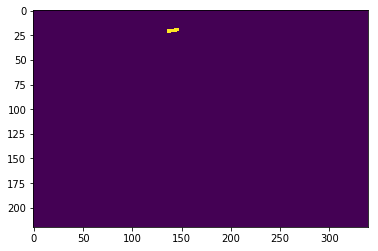

In [319]:
#plt.imshow(puck_mask_close)
#plt.imshow(puck_mask_open)
#plt.imshow(bot_mask_open)
plt.imshow(corner_back_left_mask_open)

In [320]:
itemToFind=hsv_image.copy()[19:22,140:146,:]

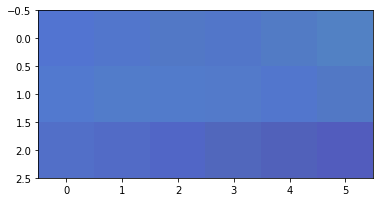

In [312]:
plt.imshow(itemToFind)

In [313]:
print("min0",np.amin(itemToFind[:,:,0]))
print("max0",np.amax(itemToFind[:,:,0]))

print("min1",np.amin(itemToFind[:,:,1]))
print("max1",np.amax(itemToFind[:,:,1]))

print("min2",np.amin(hsv_image[:,:,2]))
print("max2",np.amax(hsv_image[:,:,2]))

('min0', 81)
('max0', 83)
('min1', 92)
('max1', 129)
('min2', 9)
('max2', 254)


In [323]:
px,py,pw,ph = getMaskRectangle(puck_mask_open)
bx,by,bw,bh = getMaskRectangle(bot_mask_open)
lcx,lcy,lcw,lch = getMaskRectangle(corner_back_left_mask_open)

width=px+pw
height=py+ph

print(px,py,ph,pw)
#print(bx,by,bh)

(165, 48, 7, 21)


In [324]:
# Draw locations of puck and bot on image.
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rect1=cv2.rectangle(image,(px,py),(width,height),(0,255,0),1)
rect2=cv2.rectangle(image,(bx,by),(bx+bw,by+bh),(255,0,255),1)
rect3=cv2.rectangle(image,(lcx,lcy),(lcx+lcw,lcy+lch),(255,0,255),1)

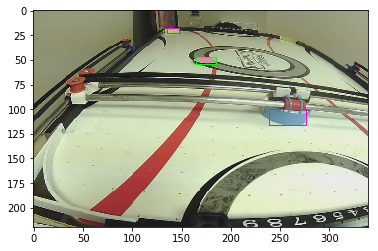

In [325]:
plt.imshow(image)